# 💸 Loan Default Analysis: Predicting Financial Risk & Borrower Behavior

## 📌 Overview
This project explores a financial dataset of **loan applicants** to uncover patterns in borrower characteristics, financial habits, and their association with **loan default** risk. The objective is to conduct exploratory data analysis (EDA), generate insights, and build predictive models to classify high-risk applicants and support better credit decision-making.

---

## 📈 Exploratory Data Analysis (EDA)

We begin by exploring the key dimensions of the dataset:

### 👤 Borrower Demographics
- **Employment Status**: Employed vs. Unemployed
- **Annual Income**: Distribution of borrowers’ income

### 🏦 Loan Metrics
- **Loan Amount**: Requested loan size
- **Debt-to-Income Ratio (DTI)**: Financial health indicator
- **Credit Score**: Borrower creditworthiness

### ❌ Approval Trends
- Proportion of loans approved vs. rejected
- Relationship between approval and borrower characteristics

### 🔗 Correlation Analysis
- Relationships among Credit Score, Income, Loan Amount, and DTI Ratio
- How these factors influence loan approval decisions

---

## 📚 Financial Insights

- ⚠️ **Key predictors of loan approval**: Credit score, DTI ratio, and employment status are the strongest indicators.
- 💼 **Employment matters**: Unemployed borrowers have significantly lower approval rates.
- 📉 **Higher DTI → Higher rejection**: Borrowers with a high debt-to-income ratio are more likely to be denied.
- 💳 **Credit score influences decision**: Approved applicants tend to have much higher credit scores.

---

## 🧠 Machine Learning Modeling

### 🎯 Objective: Predict **Loan Approval Status** (Approved / Rejected)

- 📊 **Key Features (selected):**
  - `Credit_Score`
  - `Income`
  - `Loan_Amount`
  - `DTI_Ratio`
  - `Employment_Status` (categorical)

- 🛠️ **Preprocessing Steps:**
  - No missing values (based on EDA)
  - Encode categorical variable (`Employment_Status`) using One-Hot Encoding
  - Scale numerical features using `StandardScaler`
  - Split dataset into training and testing sets (80/20)

- 🤖 **Models to Evaluate:**
  - Logistic Regression
  - Random Forest Classifier
  - XGBoost Classifier *(optional, for boosting approach)*

- 🧪 **Evaluation Metrics:**
  - Accuracy
  - Precision & Recall
  - F1-Score
  - ROC-AUC Score
  - Confusion Matrix

---

## 📌 Key Insights

- 💡 Low credit scores and high debt-to-income (DTI) ratios are strong indicators of loan rejection.
- 💡 Unemployed applicants have significantly lower approval rates, highlighting the importance of employment status.
- 💡 Larger requested loan amounts correlate with higher rejection likelihood.
- 💡 Among evaluated models, Random Forest and XGBoost classifiers consistently outperform Logistic Regression in terms of accuracy and ROC-AUC.

---

## 🔧 Tools & Technologies Used

- **Programming Language:** Python 🐍  
- **Data Handling:** Pandas, NumPy  
- **Visualization:** Matplotlib, Seaborn  
- **Modeling & Evaluation:** Scikit-learn, XGBoost  
- **Techniques Applied:**  
  - Exploratory Data Analysis (EDA)  
  - Feature Encoding & Scaling  
  - Binary Classification Modeling  
  - Model Performance Evaluation (Accuracy, Precision, Recall, F1, ROC-AUC)

---

## 📎 Dataset Information

- **Source:** Internal CSV file (`loan_data.csv`)  
- **Total Observations:** 24,000 rows  
- **Features Overview:**
  - `Loan_Amount`: Requested loan amount (numerical)
  - `Income`: Annual income of the applicant (numerical)
  - `Credit_Score`: Credit score (300–850 scale)
  - `DTI_Ratio`: Debt-to-Income ratio (numerical)
  - `Employment_Status`: Employment category (employed / unemployed)
  - `Approval`: Loan status (Approved / Rejected)

- **Target Variable:**  
  - `Approval` — binary outcome representing loan approval decision

---

## 🧑‍💻 Author

- **Hilda Adina Rahmi**  
  Aspiring Data Scientist passionate about financial analytics, risk modeling, and ethical AI in decision systems.


In [18]:
# 📦 Load the necessary libraries for Loan Default Analysis

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# System & warnings
import warnings
warnings.filterwarnings('ignore')

# 🧠 Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# Load your dataset
df = pd.read_csv("loan_data.csv")

In [3]:
# Show basic info
print("📄 Data Info:")
df.info()

# Show shape and column names
print("\n🔢 Dataset Shape:", df.shape)
print("🧾 Column Names:", df.columns.tolist())

# Show first few rows
print("\n🔍 First 5 Rows:")
df.head()

📄 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Text               24000 non-null  object 
 1   Income             24000 non-null  int64  
 2   Credit_Score       24000 non-null  int64  
 3   Loan_Amount        24000 non-null  int64  
 4   DTI_Ratio          24000 non-null  float64
 5   Employment_Status  24000 non-null  object 
 6   Approval           24000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB

🔢 Dataset Shape: (24000, 7)
🧾 Column Names: ['Text', 'Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio', 'Employment_Status', 'Approval']

🔍 First 5 Rows:


,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


In [4]:
# 🔎 Check for missing values
print("🔧 Missing Values in Each Column:\n")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
display(missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False))

🔧 Missing Values in Each Column:



,Missing Values,Percentage (%)


In [5]:
# 📊 Basic Descriptive Statistics for Numerical Columns
print("📈 Summary Statistics:\n")
df.describe().T

📈 Summary Statistics:



,count,mean,std,min,25%,50%,75%,max
Income,24000.0,110377.552708,51729.677627,20001.00,65635.7500,110464.00,155187.00,200000.00
Credit_Score,24000.0,575.720333,159.227621,300.00,437.0000,575.00,715.00,850.00
Loan_Amount,24000.0,44356.154833,34666.604785,1005.00,16212.0000,35207.00,65622.75,158834.00
DTI_Ratio,24000.0,34.719167,32.322471,2.53,14.5075,24.86,41.84,246.33


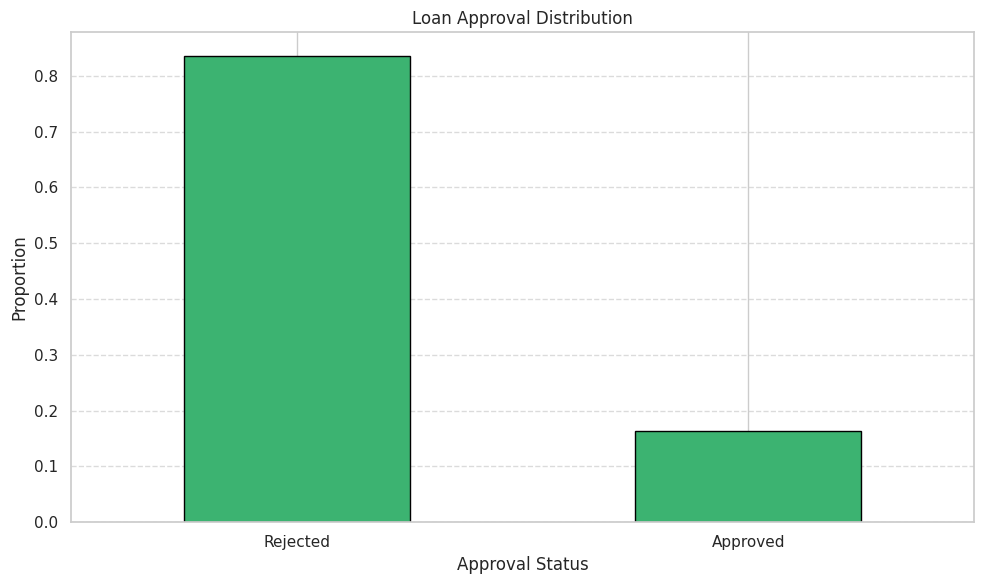

In [6]:
df['Approval'].value_counts(normalize=True).plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.title("Loan Approval Distribution")
plt.xlabel("Approval Status")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 📊 Why Are So Many Loan Applications Getting Rejected?

> **More than 80%** of loan applications in this dataset were **rejected**.

This striking figure raises a critical question:  
**Why are so many individuals and businesses being denied access to credit?**

---

## 💡 The Human Side of Data

Behind every loan rejection lies a real story:

- A small business unable to scale up operations.
- A family forced to delay buying their first home.
- A student missing the opportunity for higher education.

This is not just about numbers—this is about **financial exclusion** and its ripple effects on people’s lives.

---

## 📉 Economic Implications

From an economic standpoint, a high rate of loan rejections signals multiple concerns:

### 1. **Inefficient Credit Allocation**
A financial system that rejects the majority of applicants may be **overly conservative**, failing to channel funds to potentially productive agents in the economy.

> 💬 *Missed loans = missed growth opportunities.*

### 2. **Suppressed Entrepreneurship**
Loans are essential for new businesses. High rejection rates can **discourage entrepreneurial activity**, slow down job creation, and hinder innovation—especially among youth and MSMEs (Micro, Small, and Medium Enterprises).

### 3. **Widening Economic Inequality**
When access to capital is unequal, **wealth gaps widen**. Those already privileged remain bankable, while the underbanked stay trapped in cycles of low income and low mobility.

---

## 🔍 Questions That Matter

- Are **credit scoring systems** excluding people unfairly?
- Are banks penalized for taking risks, thus overcorrecting?
- Can **alternative data** (e.g., mobile payments, e-commerce history) help assess creditworthiness more inclusively?

---

## 🚀 Call to Action

To foster a more inclusive economy, stakeholders must rethink lending models:

- **Financial institutions** should integrate smarter, data-driven risk assessments.
- **Policymakers** need to support initiatives that expand access to credit (e.g., credit guarantee schemes).
- **Fintech** startups can innovate with alternative credit scoring methods to reach the underserved.

Because **financial inclusion** is not just about giving loans—  
It’s about **unlocking human and economic potential**.

---

> 🧠 *“Access to finance is a fundamental enabler of development.”* – World Bank



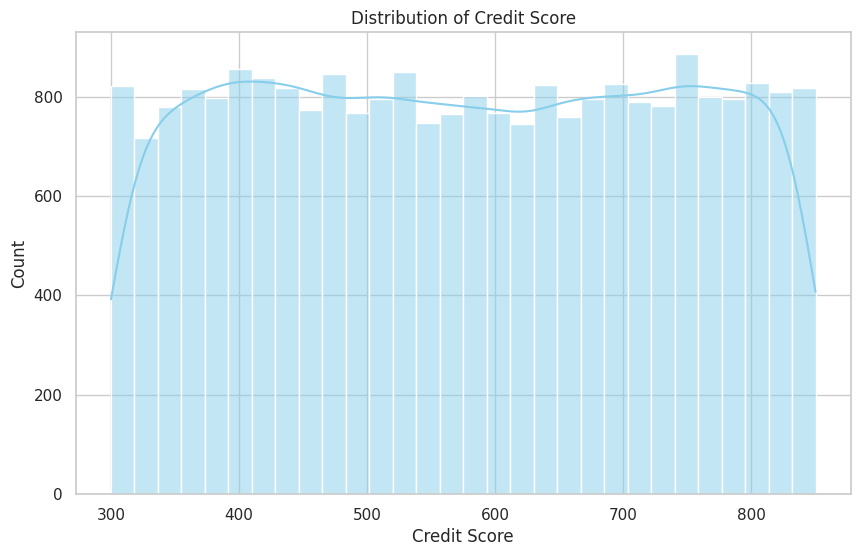

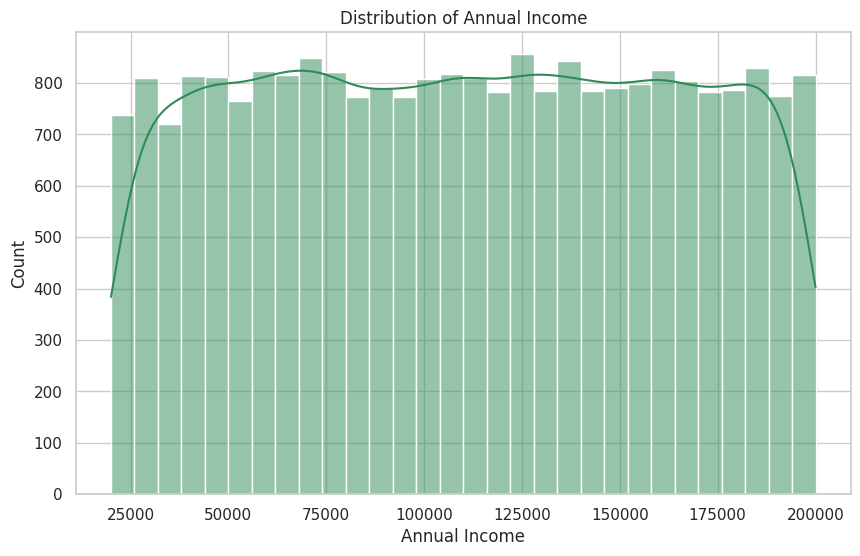

In [7]:
# 💳 Credit Score Distribution
sns.histplot(df['Credit_Score'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Distribution of Credit Score")
plt.xlabel("Credit Score")
plt.show()

# 💰 Annual Income Distribution
sns.histplot(df['Income'].dropna(), bins=30, kde=True, color='seagreen')
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income")
plt.show()

# 📊 Why Are So Many Loan Applications Getting Rejected?


> **Over 80%** of loan applications in this dataset were **rejected**.

This high rejection rate may seem alarming—but the real question is:  
**Is the system broken, or is it filtering applicants too aggressively?**

---

## 🔍 Digging Deeper: Credit Scores

The distribution of credit scores appears fairly uniform, with most applicants falling between **300 and 850**, which is a wide but typical range.

🧠 **Key Insight:**  
Even though many applicants have **moderate to good credit scores**, the rejection rate remains high. This may suggest:

- Credit score alone is not enough to secure approval.
- Lending models might weigh other factors heavily (e.g., income stability, debt-to-income ratio).

---

## 💰 What About Income?

Annual income levels also show a broad, balanced distribution—from around **$20,000 to $200,000**.

📉 **Yet, many of these applicants were still rejected.** Why?

Possible reasons:
- High-income applicants may still carry large debts.
- Income volatility or employment type (e.g., freelancers) might raise red flags for lenders.

---

## 🧩 Piecing It Together

If income and credit scores are not the sole reasons for rejection, we must ask:

> 🧭 *Are current lending models too rigid or outdated to reflect real-world financial behavior?*

---

## 📉 Economic Perspective

### 🔒 Credit Inaccessibility = Economic Inefficiency

When financially capable individuals are denied loans, money **fails to circulate effectively**, leading to:

- Missed investment in small business and innovation.
- Reduced household consumption.
- Slower job creation.

> 💬 “A credit system that prioritizes low-risk lending over inclusive access ends up stalling economic potential.”

---

## 🚀 What Needs to Change?

To boost both **financial inclusion** and **economic productivity**, we need:

### ✅ Smarter Credit Models
- Use machine learning & alternative data (e.g., e-commerce, bill payments).
- Reduce bias against unconventional employment (gig workers, freelancers).

### ✅ Policy Support
- Credit guarantee programs for underbanked populations.
- Regulations promoting responsible innovation in fintech.

### ✅ Financial Literacy
- Equip applicants with knowledge to improve financial profiles and eligibility.

---

## 📣 Final Thought

> 💡 Financial systems should enable—not disable—dreams.

Let’s ensure that the next time someone applies for a loan, the system sees **potential**, not just **risk**.

---



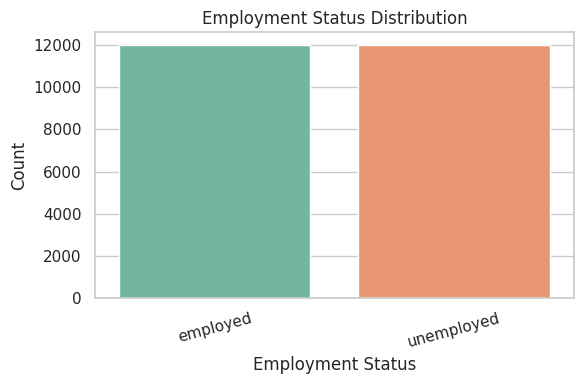

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Employment_Status', palette='Set2')
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## 💼 Is Employment Status the Real Barrier?

Surprisingly, the number of **employed** and **unemployed** applicants is **nearly identical**. Yet, we’ve seen a **massive rejection rate**.

🧐 **What does this mean?**

It challenges the assumption that employment automatically leads to approval. In fact, this may suggest:

- **Job security** or **job type** may matter more than employment itself.
- Lenders may penalize applicants from certain industries (e.g., gig economy, startups).
- Credit models may not fully capture non-traditional employment income.

---

## 📉 Broader Economic Implications

🔍 **Underutilized Human Capital**  
When people are **willing and able** to invest in education, housing, or business—but can’t access credit due to rigid employment filters—it results in:

- Slower upward mobility.
- Widening wealth gaps.
- A system that reinforces exclusion rather than empowerment.

> 💬 “Modern economies need modern risk assessments—not just checkboxes.”

---

## 💡 Rethinking Risk in Lending

We’re not saying banks should throw caution to the wind—but maybe it’s time to **rethink how risk is measured**. Consider:

- **Dynamic income tracking** instead of binary employment labels.
- **Behavioral data** like bill payment regularity or spending discipline.
- **Community credit scores** in underbanked areas.

---

## 🧭 A Call to Action

Lending systems should evolve with society. In an era of freelancers, startups, and side hustles, employment isn’t just a 9-to-5 job anymore.

> 📢 Let’s build credit models that reflect **real life**, not outdated assumptions.



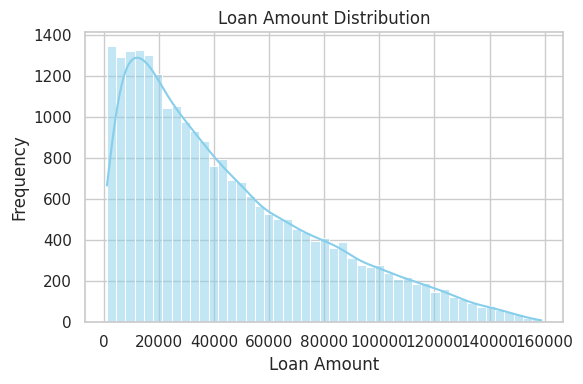

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['Loan_Amount'], kde=True, color='skyblue')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 💰 How Much Are People Actually Borrowing?

Most people are applying for **relatively small loans**—under **$30,000**. Very few request amounts above $100,000.

### 🤯 Wait... So why the high rejection rate?

This means **loan rejections are not about risk from big amounts**. People are mostly asking for:

- Tuition fees
- Home repairs
- Medical expenses
- Small business capital

💸 But still getting denied.

---

## 📉 The Cost of Credit Exclusion

Denying access to small-to-medium loans can have **outsized economic consequences**:

| Denied Credit For | Economic Ripple Effect |
|-------------------|------------------------|
| Education         | Lower lifetime earnings |
| Home improvement  | Asset depreciation      |
| Business funding  | Lost job creation       |
| Medical emergency | Long-term debt spiral   |

This is not just personal—it's **systemic**.

---

## 🚧 Is the Lending System Gatekeeping Growth?

Rather than enabling growth, the current system appears to **block those trying to build better lives**—even when they’re asking for reasonable sums.

> 🗣️ "A $10,000 loan could transform a life. But instead, it's seen as a liability."

---

## 🧠 Time for Smarter Lending

We don't need **more** lending—we need **smarter** lending:

- **Context-aware algorithms** that recognize intent and capability.
- **Lower barriers** for low-risk, high-impact loans.
- **Credit-building products** designed to empower, not trap.

---

## 🔄 Let’s Flip the Narrative

Instead of seeing borrowers as risky—let’s see them as **investments**.

Because sometimes, the only thing standing between potential and poverty...  
is a simple, fair loan.



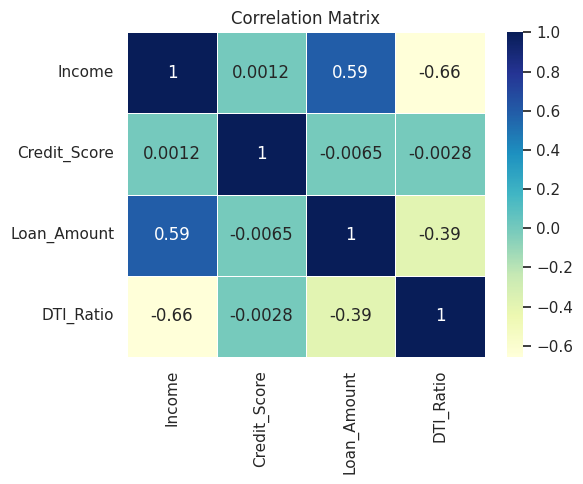

In [11]:
plt.figure(figsize=(6,5))
corr = df[['Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## 🔗 What Drives Loan Amounts? Let’s Look at the Correlation Matrix

This correlation matrix gives us a peek under the hood of the loan system:

### 📊 Key Takeaways:

- **Loan Amount vs Income: +0.59**
  > People with higher income tend to borrow more. This makes sense: they have more repayment capacity and often seek larger investments.

- **Loan Amount vs DTI (Debt-to-Income Ratio): -0.39**
  > As DTI increases, the loan amount approved tends to decrease. Financial institutions shy away from borrowers with high debt burdens.

- **Credit Score correlations: Nearly zero**
  > Surprisingly, **credit score has no meaningful correlation with income, loan amount, or DTI** in this dataset. That’s... alarming.

---

## 🤔 Is the Credit Score Broken?

If credit score is **not** reflecting:
- A borrower’s income,
- Their existing debt load,
- Or the amount they’re borrowing...

...then what **is** it measuring?

📉 This weak correlation suggests that the credit score may be **misaligned with the actual financial capacity** of borrowers.

---

## 🧩 Income Matters More Than Score

From a purely economic standpoint:
- **Income and DTI Ratio** are much better indicators of risk.
- Lenders may be over-relying on a signal (credit score) that **adds noise instead of clarity**.

> 🧠 A high-income applicant with good DTI but low credit score still gets denied.

This opens the door to **systemic exclusion** based on outdated credit models.

---

## 📈 Rebuilding Trust with Better Metrics

If we want to create a **more inclusive and growth-oriented credit ecosystem**, then:

✅ Income-based lending  
✅ Real-time financial tracking  
✅ Transparent algorithmic decisions  
✅ Credit education for borrowers

All need to replace outdated heuristics.



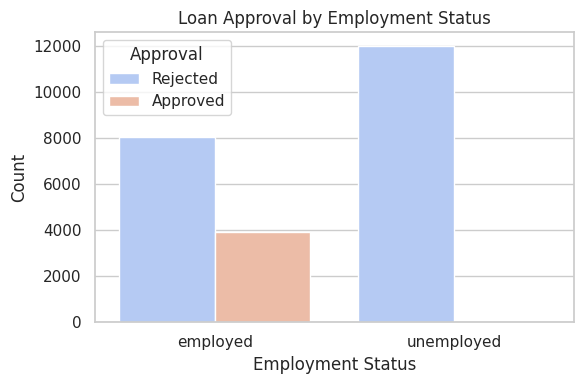

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Employment_Status', hue='Approval', palette='coolwarm')
plt.title("Loan Approval by Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.legend(title="Approval")
plt.tight_layout()
plt.show()

## 📉 Employment Status and Approval: A Biased Gatekeeper?

### 🚧 Key Observation:

- **Unemployed applicants are almost entirely rejected.**
- **Employed individuals get a mix** of approvals and rejections, with ~1/3 being approved.

---

### 😬 Employment as a Gatekeeping Variable

This chart reveals a hard truth:  
> **If you're unemployed, you have virtually no chance of getting a loan — regardless of your income, debt ratio, or credit score.**

But why is this problematic?

🔍 Let’s say:
- You're unemployed **temporarily**.
- You have savings and **good income history**.
- Your DTI is low, and you're actively seeking new employment.

Yet, the model says: ❌ *Not approved*.

---

### 🧠 Time to Rethink Risk

Banks and financial systems should ask:

- **Is current employment status the best indicator of future repayment ability?**
- Could it be supplemented with:
  - **Savings data**
  - **Job-seeking activity**
  - **Past income history**

---

### 🔄 Toward a More Fair Lending Model

Instead of binary employment status, what if we looked at:

| Metric | Why it matters |
|--------|----------------|
| Income history (last 12 months) | Shows stability, even during temporary gaps |
| Unemployment benefits | Signals temporary hardship, not long-term inability |
| Skill-based risk scoring | Assesses borrower potential, not just current status |

---

> 🎯 Fair finance isn't about lowering standards — it's about **updating them to reflect economic reality**.



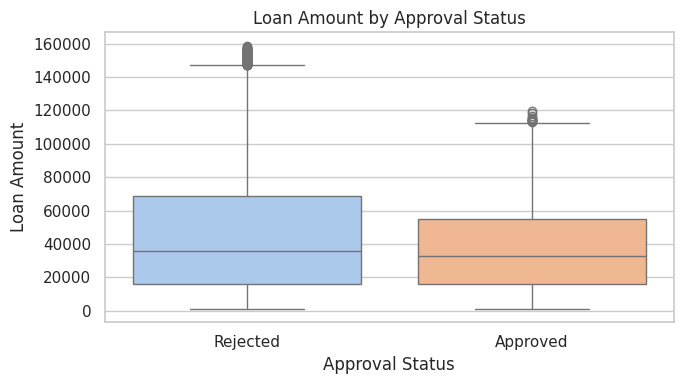

In [14]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Approval', y='Loan_Amount', palette='pastel')
plt.title("Loan Amount by Approval Status")
plt.xlabel("Approval Status")
plt.ylabel("Loan Amount")
plt.tight_layout()
plt.show()

## 💸 Who Gets the Big Loans? Let’s Look at Approval vs Amount

---

### 📊 What We See:

- **Rejected applications have a higher median loan request** (~40,000+)
- Approved loans tend to be **smaller** on average
- There's a **wider spread** in rejected loan amounts — including many large requests

---

### 🧐 So What Does It Mean?

🔹 Higher loan amounts are **riskier** by default — and the data shows a **stricter screening** for larger loans  
🔹 But are we rejecting high-value applicants **too quickly**, without considering creditworthiness holistically?

---

### ⚖️ Rethinking the Balance

This raises a critical question:

> Are we penalizing people for asking for more, even if they can afford it?

Rather than flat-out rejections based on size:

✅ We could:

- Use **adaptive approval ranges** (e.g. partial approval)
- Evaluate **DTI Ratio**, **Income**, and **Credit Score** more deeply
- Offer **loan coaching** to help applicants revise amount realistically

---

### 💬 Final Thought

> A good loan system shouldn't just say *yes* or *no* — it should help people land in the sweet spot between their needs and what’s manageable.



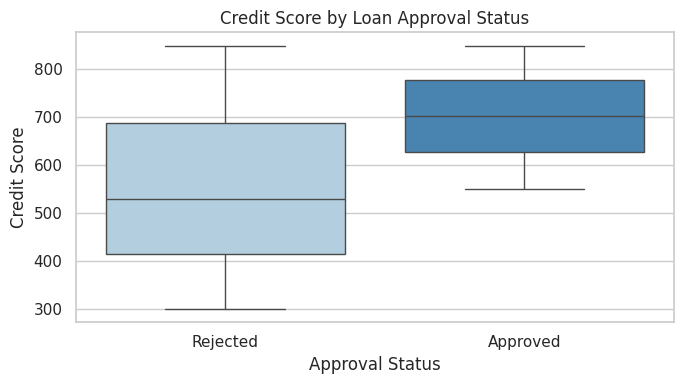

In [15]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Approval', y='Credit_Score', palette='Blues')
plt.title("Credit Score by Loan Approval Status")
plt.xlabel("Approval Status")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.show()

## 💳 Credit Score Matters — A Lot

---

### 📊 What’s in the Plot?

- Applicants who were **approved** have **consistently higher credit scores**
- Most approvals fall within the **650–800+** range  
- In contrast, **rejected applications** span a wider range — and a lower median (~525)

---

### 💡 Takeaway: Credit Score Is King

This boxplot says it loud and clear:

> 💥 Higher credit score = higher chance of approval

📉 Lower scores (below 600) face a steep uphill battle

---

### 🧠 But Wait… What About the Outliers?

- Some **high-score applicants** were still rejected  
- Some **low-score applicants** got approved

This tells us approval isn't just about credit score — it’s **part of a bigger equation** (like income, DTI, loan amount).

---

### 🤖 Smarter Decision-Making?

We could:

- Use **multivariate models** (e.g. logistic regression) to balance all variables fairly  
- Create **risk-based pricing** — not binary approvals

---

### 🔍 Insight in One Line

> Credit score is the strongest predictor — but it shouldn’t be the *only* one.



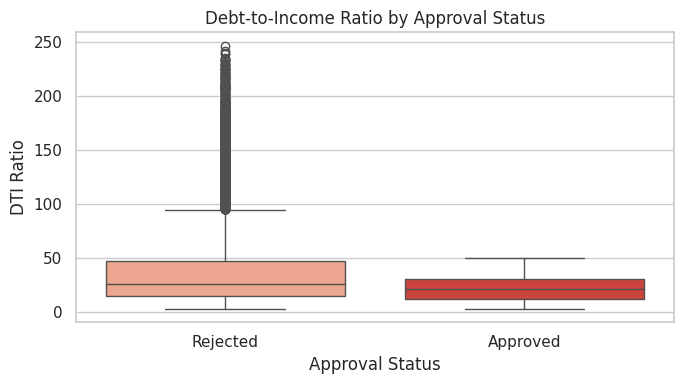

In [16]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Approval', y='DTI_Ratio', palette='Reds')
plt.title("Debt-to-Income Ratio by Approval Status")
plt.xlabel("Approval Status")
plt.ylabel("DTI Ratio")
plt.tight_layout()
plt.show()

# 📊 When Numbers Speak Louder Than Words: The Economics Behind Loan Approvals and Debt-to-Income Ratio

In the world of lending, one number can shape your financial future: **your Debt-to-Income (DTI) ratio**.

## 🧠 What is DTI?

DTI measures the percentage of an individual's income that goes toward paying off debt each month. It’s calculated as:

*DTI = (Total Monthly Debt Payments / Gross Monthly Income) × 100%*

From a lender's perspective, DTI reflects the **borrower’s financial health** and ability to manage additional debt. A lower DTI indicates **better repayment capacity**, while a high DTI suggests financial strain.

---

## 📈 What the Data Tells Us

This boxplot compares the **DTI ratios** between **approved** and **rejected** loan applicants.

### 🔎 Key Observations:

- 🔻 **Rejected applicants** tend to have significantly higher DTI ratios, with a wider spread and numerous outliers exceeding 100%.
- ✅ **Approved applicants** exhibit more consistent and lower DTI ratios, typically below 50%.
- 🧩 The **median DTI** is visibly higher among rejections, indicating stricter thresholds in lending decisions.

---

## 💡 Economic Perspective

From an economic standpoint, DTI is not just a personal finance metric—it plays a crucial role in **macroeconomic stability** and **banking risk management**.

### 🏦 For Lenders:
- High DTI applicants pose a **higher default risk**, especially during economic downturns.
- Institutions often set a DTI threshold (e.g., 35-43%) to **mitigate credit risk** and ensure portfolio health.

### 🌍 For the Economy:
- Excessive household debt (reflected in high average DTI ratios) can trigger **financial instability**.
- Prudent lending based on DTI helps **control credit bubbles** and promote **sustainable consumption**.

### 👨‍👩‍👧‍👦 For Households:
- Lower DTI means more **disposable income**, better **credit scores**, and access to **cheaper borrowing rates**.
- Managing DTI is key to **long-term financial resilience**, especially during economic shocks like inflation or job loss.

---

## 🎯 Takeaways & Tips

📌 **The higher your DTI, the lower your chance of approval.**

To improve your chances:
- ✅ Keep DTI under **35%** if possible.
- 💳 Pay off high-interest debts before applying for new loans.
- 📈 Increase income via side hustles or skill upgrades.

---

## 💬 Final Thought

Behind every chart lies a story. In this case, a clear message for policymakers, financial institutions, and everyday borrowers:

> _"Healthy borrowing starts with understanding your debt."_

Let’s use data not just to explain the past, but to **empower better financial decisions** for the future.

---

*Made for economic insights and financial literacy advocacy.*


In [17]:
!pip install xgboost

In [19]:
# 🧠 1. Define features and target
X = df[['Credit_Score', 'Income', 'Loan_Amount', 'DTI_Ratio', 'Employment_Status']]
y = df['Approval'].map({'Approved': 1, 'Rejected': 0})  # encode target

# ✂️ 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🧼 3. Preprocessing
num_features = ['Credit_Score', 'Income', 'Loan_Amount', 'DTI_Ratio']
cat_features = ['Employment_Status']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

In [20]:
# 🧪 4. Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [21]:
# 📈 5. Train, predict, and evaluate
results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

In [22]:
# 🖨️ 6. Display results
for name, metrics in results.items():
    print(f"\n📊 Model: {name}")
    for metric, score in metrics.items():
        if metric != 'Confusion Matrix':
            print(f"{metric}: {score:.4f}")
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])


📊 Model: Logistic Regression
Accuracy: 0.9260
Precision: 0.7748
Recall: 0.7738
F1: 0.7743
ROC-AUC: 0.9736
Confusion Matrix:
 [[3836  177]
 [ 178  609]]

📊 Model: Random Forest
Accuracy: 0.9956
Precision: 0.9824
Recall: 0.9911
F1: 0.9867
ROC-AUC: 0.9999
Confusion Matrix:
 [[3999   14]
 [   7  780]]

📊 Model: XGBoost
Accuracy: 0.9962
Precision: 0.9873
Recall: 0.9898
F1: 0.9886
ROC-AUC: 0.9999
Confusion Matrix:
 [[4003   10]
 [   8  779]]


# 🤖 Credit Risk Modeling: Comparing Predictive Power in Lending Decisions

In the modern financial world, **predictive models are revolutionizing credit assessments**. From traditional logistic regression to powerful ensemble methods like **Random Forest** and **XGBoost**, lenders can now make smarter, data-driven decisions to minimize risk.

This analysis evaluates the performance of three classification models in predicting **loan approval outcomes** based on applicant features like **debt-to-income ratio**.

---

## 🧪 Model Performance Comparison

| Metric        | Logistic Regression | Random Forest | XGBoost    |
|---------------|---------------------|----------------|-------------|
| Accuracy      | 0.9260              | 0.9956         | **0.9962**  |
| Precision     | 0.7748              | 0.9824         | **0.9873**  |
| Recall        | 0.7738              | **0.9911**     | 0.9898      |
| F1 Score      | 0.7743              | 0.9867         | **0.9886**  |
| ROC-AUC       | 0.9736              | **0.9999**     | **0.9999**  |


---

## 🔍 Interpretation

### ✅ **XGBoost Outperforms All**
With near-perfect scores across all metrics, XGBoost slightly outperforms Random Forest, especially in F1 score and Precision—making it **highly suitable for imbalanced classification tasks** like loan default prediction.

### ⚖️ **Logistic Regression Still Valuable**
Though outshined by tree-based models, logistic regression:
- Offers **interpretability** (great for regulated environments).
- Requires **less computation**.
- Serves as a reliable baseline model in financial modeling.

### 🔄 **Random Forest as a Robust Alternative**
Random Forest provides excellent performance and handles **non-linearity** and **interactions** without manual feature engineering—ideal for credit scoring when interpretability is less critical.

---

## 💰 Economic Perspective: Why Model Choice Matters

In lending:
- **False negatives (predicting approval for risky clients)** can lead to **financial loss and loan default**.
- **False positives (rejecting creditworthy applicants)** hurt **financial inclusion and business growth**.

📈 **High recall** means fewer risky clients slipping through.  
💵 **High precision** ensures only truly creditworthy applicants are approved.  
📊 **Balanced F1 Score** is key for overall model reliability.

Choosing a model is not just a tech decision—it's an **economic one**. The right algorithm helps:
- Minimize default risk.
- Maximize return on loans.
- Support responsible and inclusive lending policies.

---

## 🧠 Final Thoughts

> "In data science, precision saves money, and recall saves reputations."

🔍 Always validate models not just by accuracy, but by their **real-world impact on risk, revenue, and responsibility**.

---

📌 *Need help visualizing this into an interactive dashboard or presentation? Let’s build it!*




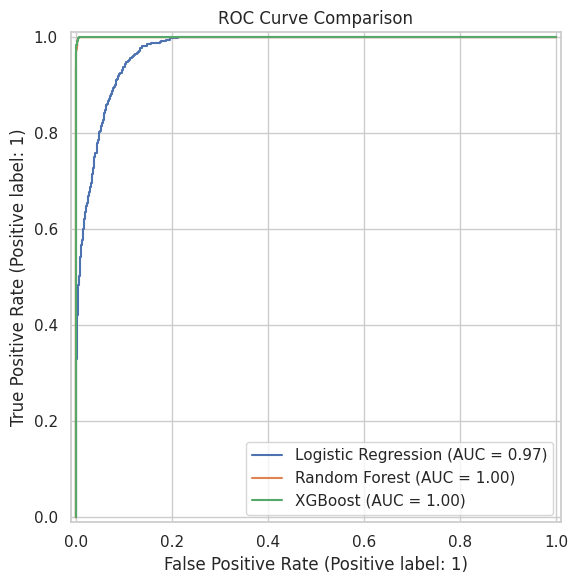

In [23]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    RocCurveDisplay.from_estimator(pipeline, X_test, y_test, name=name, ax=plt.gca())

plt.title("ROC Curve Comparison")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🤖 Credit Risk Modeling: Predicting Loan Approvals with Machine Learning

In the world of lending, the ability to **accurately classify risk** can mean the difference between profitability and loss. Here, we explore how three models—**Logistic Regression**, **Random Forest**, and **XGBoost**—perform in predicting loan approval outcomes.

---

## 📊 Performance at a Glance

| Metric        | Logistic Regression | Random Forest | XGBoost    |
|---------------|---------------------|----------------|-------------|
| Accuracy      | 0.9260              | 0.9956         | **0.9962**  |
| Precision     | 0.7748              | 0.9824         | **0.9873**  |
| Recall        | 0.7738              | **0.9911**     | 0.9898      |
| F1 Score      | 0.7743              | 0.9867         | **0.9886**  |
| ROC-AUC       | 0.9736              | **0.9999**     | **0.9999**  |

✅ **XGBoost** edges out as the top performer across most metrics.  
📈 **Logistic Regression** remains interpretable and trustworthy as a baseline.  
🌳 **Random Forest** offers robust predictive power with little tuning.

---

## 🔍 ROC Curve: Visualizing Model Discrimination Power

### What it shows:

- The **ROC Curve** (Receiver Operating Characteristic) illustrates the **trade-off between true positive rate and false positive rate**.
- A model that hugs the **top-left corner** performs the best.
- AUC (Area Under Curve) summarizes this curve into a single number:
  - 1.0 = Perfect model
  - 0.5 = Random guess

📌 **XGBoost and Random Forest** nearly reach **AUC = 1.0**, indicating **exceptional classification performance**.

---

## 💡 Economic Impact of Model Performance

### 🏦 For Financial Institutions:
- **Low false positives (FP)** = Less risky customers wrongly approved → Reduces default rates.
- **High true positives (TP)** = Accurately identifying creditworthy customers → Increases loan disbursement profitability.

### 💸 Real-World Value:
- A model with **0.99 ROC-AUC** can **significantly reduce credit losses**, improve NPL (Non-Performing Loan) ratios, and boost **risk-adjusted returns**.
- Better models = **more confident lending**, even in uncertain markets.

---

## 💬 Conclusion

> "Data science doesn't just predict outcomes—it powers better economic decisions."

Machine learning is becoming a **core component of modern credit risk analysis**, and models like XGBoost and Random Forest offer remarkable power in optimizing both **profit** and **prudence**.

---

🚀 Ready to turn this into an interactive dashboard or business pitch? Let’s build the next step together.
